In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
gen_folder_000 = r"F:\little_fish_simulation_logs\generation_0000000"
gen_folder_050 = r"F:\little_fish_simulation_logs\generation_0000050"
color_000 = "#1a5276"
color_050 = "#a04000"

clip_top_lifespan=20000
default_lifespan=10000

In [3]:
def plot_generation_lifespan(
    gen_folder,
    ax=None,
    linecolor='k',
    clip_top_lifespan=30000,
    default_lifespan=10000,
    should_plot_default=True,
    **kwargs,
):
    lifespans = []
    for fn in os.listdir(gen_folder):
        if fn[0:5] == 'fish_' and fn[-5:] == '.hdf5':
            curr_f = h5py.File(os.path.join(gen_folder, fn), 'r')
            sim_n = [s for s in curr_f.keys() if s[:11] == 'simulation_']
            if len(sim_n) != 1:
                raise ValueError('number of simulation for fish ({}) does not '
                                'equal one'.format(curr_f['fish/name'][()]))
            sim_n = sim_n[0]
            lifespans.append(curr_f[sim_n]['simulation_log/last_time_point'][()])
            curr_f.close()

    life_spans_plot = np.clip(lifespans, 0, clip_top_lifespan)
    values, bin_edges = np.histogram(life_spans_plot, bins=60, range=[0, clip_top_lifespan])
    bin_width = np.mean(np.diff(bin_edges))
    bin_centers = (bin_edges[:-1] + bin_width / 2.).astype(np.int32)

    df_plot = pd.DataFrame({
        "fish count": values,
        "life span": bin_centers,
    })

    generation = int(os.path.split(gen_folder)[-1].split("_")[-1])
    # mean_life_span = np.mean(life_spans)
    
    if ax is None:
        f, ax = plt.subplots(figsize=(10, 5))
    
    if should_plot_default:
        ax.axvline(x=default_lifespan, ls='--', color='r', label="default")

    ax.step(df_plot["life span"], df_plot["fish count"], where='mid', lw=2, color=linecolor, label=f"gen_{generation:03d}", **kwargs)
    ax.set_xlim(-10, clip_top_lifespan)
    ax.set_xlabel("Lifespan", fontsize=16)
    ax.set_ylabel("Fish count", fontsize=16)
    ax.set_title(f"Lifespan distribution", fontsize=16)
    # ax.set_ylim([0, ax.get_ylim()[1]])
    ax.legend()

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # plt.tight_layout()

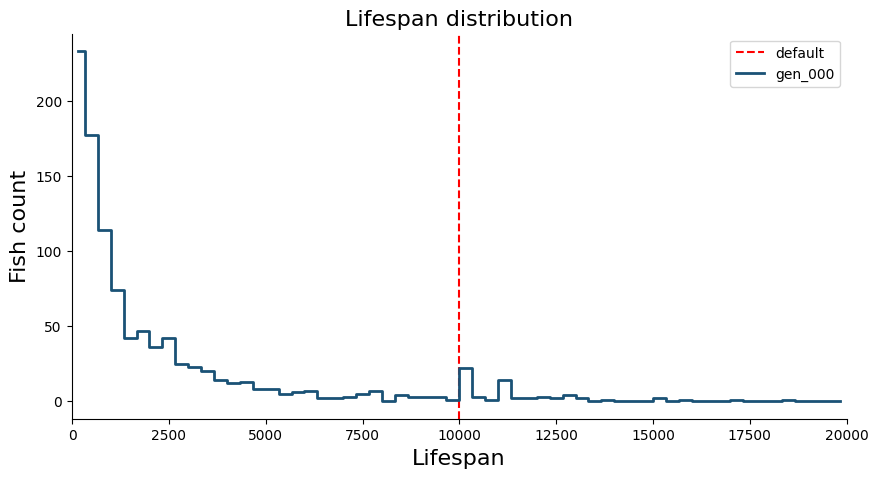

In [4]:
plot_generation_lifespan(
    gen_folder=gen_folder_000, 
    clip_top_lifespan=clip_top_lifespan, 
    linecolor=color_000,
    default_lifespan=default_lifespan,
)

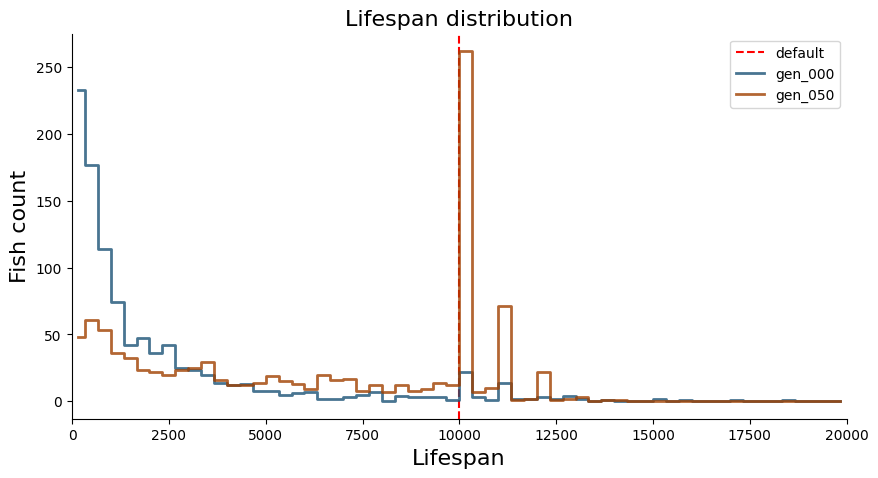

In [6]:
f, ax = plt.subplots(figsize=(10, 5))

plot_generation_lifespan(
    gen_folder=gen_folder_000, 
    clip_top_lifespan=clip_top_lifespan, 
    linecolor=color_000,
    default_lifespan=default_lifespan,
    should_plot_default=True,
    ax=ax,
    alpha=0.8,
)

plot_generation_lifespan(
    gen_folder=gen_folder_050, 
    clip_top_lifespan=clip_top_lifespan, 
    linecolor=color_050,
    default_lifespan=default_lifespan,
    should_plot_default=False,
    ax=ax,
    alpha=0.8,
)